# WeRateDogs Twitter Archive Wrangling Project

WeRateDogs Data Wrangling project focuses on gathering, assessing, cleaning, and analysing WeRateDogs’ Twitter archive to generate meaningful insights and exciting visualisations. 
The project sought to answer these three questions:
1. The dog breeds that had the highest and lowest average ratings 
2. The most popular original tweet by WeRateDogs
3. The dog breeds that generated the most retweets and favourites



## Background
WeRateDogs is a social media page that rates people’s dogs with humorous comments. It was founded by Matt Nelson in 2015 and has since become an authority in dog ratings. Aside from rating people’s dogs, the page also helps animal rights organisations such as ASPCA (American Society for the Prevention of Cruelty to Animals) raise funds and it runs GoFundMe campaigns for dogs. 

## The Dataset

The main data required for this project was WeRateDogs’ Twitter archive, which WeRateDog itself provided to Udacity.

Here is a sample of the data:

In [ ]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


Two additional datasets were generated based on the Twitter archive:

**Image prediction**: This data was generated by running every image in the WeRateDogs Twitter archive through a neural network that can classify breeds of dogs.

The variables in this data are:

- tweet_id is the last part of the tweet URL after "status/"
- jpg_url is the image URL
- img_num is the image number corresponding to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).
- p1 is the algorithm's #1 prediction for the image in the tweet
- p1_conf is how confident the algorithm is in its #1 prediction
- p1_dog is whether or not the #1 prediction is a breed of dog
- p2 is the algorithm's second most likely prediction
- p2_conf is how confident the algorithm is in its #2 prediction 
- p2_dog is whether or not the #2 prediction is a breed of dog 
- p3 is the algorithm's third most likely prediction
- p3_conf is how confident the algorithm is in its #3 prediction 
- p3_dog is whether or not the #3 prediction is a breed of dog

In [ ]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**Tweet_df**: This data was generated from querying Twitter API for WeRateDogs’ Twitter archive 

The variables in this data are:

- tweet_id
- retweet_count is the number of times a tweet was retweeted
- favourite_count is the number of times a tweet was favourited.

In [ ]:
tweet_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Cleaning

With the three pieces of data at hand, we proceeded to treat the eight data quality and five data tidiness issues present. These issues covered the four key dimensions of data quality, which are:
- Completeness
- Validity
- Accuracy
- Consistency

> We will only cover the key data quality and tidiness issues in this article. Here is a link to the jupyter notebook if you want to dive deep into the data cleaning process of this project.

A few of the paramount data quality and tidiness issues we drew out from assessing the three data were:
1. One variable was divided into three columns in the twitter_archive data: tidiness issue
2. Tweets with multiple dog stages: consistency issue
3. Presence of replies and retweets in the ``twitter_archive`` table: validity issue
4. Two variables were divided into nine columns in the image_prediction data: tidiness issue

#### These are the steps we took in resolving the first and second issues:
- Created a new dataframe (``dog_stage_df``) from ``twitter_archive`` data using pd.melt()
- Combined the dog stages of rows with more than one dog stage
- Merged ``dog_stage_df`` and ``twitter_archive``

In [ ]:
dog_stage_df = pd.melt(twitter_archive_clean, id_vars='tweet_id', value_vars=['doggo', 'floofer', 'pupper', 'puppo'], value_name='dog_stage')

# drop the variable column
dog_stage_df.drop('variable', axis=1, inplace=True)

# drop duplicate rows
dog_stage_df.drop_duplicates(inplace=True)

# replace None with np.NaN
dog_stage_df['dog_stage'] = dog_stage_df['dog_stage'].replace('None', np.NAN)

In [ ]:
# combine stages for tweets with more than one dog stage
with_dog_stages = dog_stage_df[dog_stage_df.dog_stage.notna()]
combined_stages = with_dog_stages.groupby('tweet_id').transform(lambda x: ', '.join(x))

# replace these combined stages in the dog_stage_df
dog_stage_df.loc[combined_stages.index, 'dog_stage'] = combined_stages.values

# drop duplicates
dog_stage_df.sort_values(by='dog_stage', inplace=True)
dog_stage_df.drop_duplicates(subset='tweet_id', inplace=True)

In [ ]:
# left merge dog_stage_df with twittwer_archive_clean
twitter_archive_clean = pd.merge(twitter_archive_clean, dog_stage_df, how='left', on='tweet_id')

# drop doggo, floofer, pupper, and puppo columns
twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [ ]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  dog_stage                   380 n

##### For the third data quality issue, we simply dropped the rows that were replies and retweets

In [ ]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['in_reply_to_user_id'].isnull()]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_user_id'].isnull()]

# drop the columns in_reply_to_status_id and in_reply_to_user_id
twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace=True)

# drop the columns retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp
twitter_archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

In [ ]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   dog_stage           336 non-null    object
dtypes: int64(3), object(6)
memory usage: 163.8+ KB


#### The fourth issue was resolved using ``np.select()``

> ``numpy.select()`` return an array drawn from elements in choicelist, depending on conditions. You can learn more about that function [here](https://numpy.org/doc/stable/reference/generated/numpy.select.html)

We defined the condition and the choicelists for the variables dog breed and picture confidence, then created them using ``np.select()``

In [ ]:
# define the condlist and the choice lists
condlist = [(image_prediction_clean['p1_dog'] == True), (image_prediction_clean['p2_dog'] == True), (image_prediction_clean['p3_dog'] == True)]
choicelist = [image_prediction_clean['p1'], image_prediction_clean['p2'], image_prediction_clean['p3']]
choicelist_2 = [image_prediction_clean['p1_conf'], image_prediction_clean['p2_conf'], image_prediction_clean['p3_conf']]

# use np.select() to create breed and picture confidence columns
image_prediction_clean['breed'] = np.select(condlist, choicelist, default='Unknown')
image_prediction_clean['pix_conf'] = np.select(condlist, choicelist_2, default=0)

In [ ]:
# drop the columns that are not needed
image_prediction_clean.drop(['img_num', 'p1', 'p1_dog', 'p1_conf', 'p2', 'p2_dog', 'p2_conf', 'p3', 'p3_dog', 'p3_conf'], axis=1, inplace=True)

In [ ]:
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   breed     2075 non-null   object 
 3   pix_conf  2075 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 65.0+ KB


In [ ]:
image_prediction_clean['breed'].value_counts()

Unknown                 324
golden_retriever        173
Labrador_retriever      113
Pembroke                 96
Chihuahua                95
                       ... 
Scotch_terrier            1
EntleBucher               1
Japanese_spaniel          1
standard_schnauzer        1
Bouvier_des_Flandres      1
Name: breed, Length: 114, dtype: int64

## Visualisation

This takes us back to the beginning of this article were we mentioned the three key questions we wish to answer, which are:
- The dog breeds that had the highest and lowest average ratings 
- The most popular original tweet by WeRateDogs
- The dog breeds that generated the most retweets and favourites

Having successfully cleaned of our data and combined the three pieces of data into one dataset (twitter_archive_master), we can proceed with drawing insights from it

> We missed some key steps in assessing and cleaning process for this project. You can learn more about that process by going through the jupyter notebook here.

### The dog breeds that had the highest and lowest average ratings

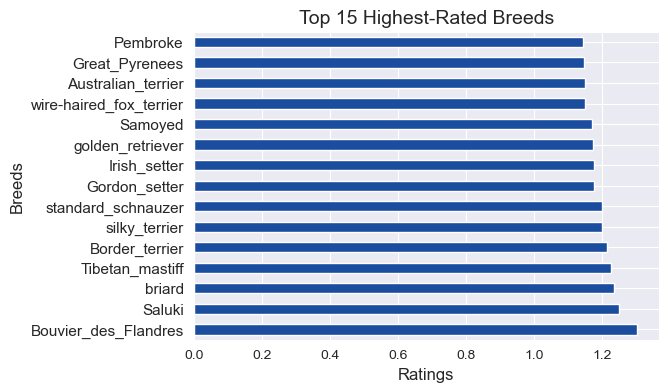

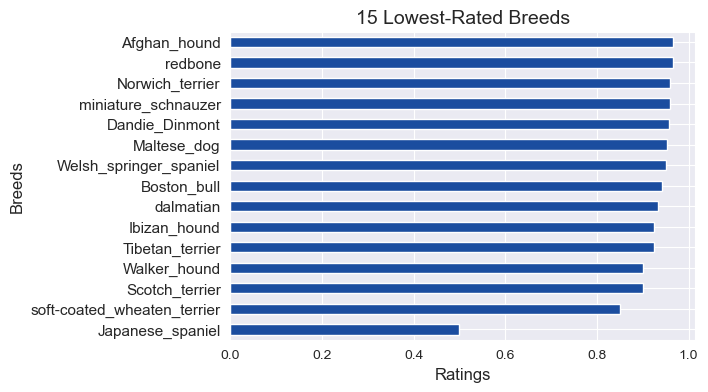

- The top three breeds with the highest average ratings are: [Bouvier Des Flandres](https://upload.wikimedia.org/wikipedia/commons/7/7f/Bouvier.JPG) (1.3), [Saluki](https://upload.wikimedia.org/wikipedia/commons/thumb/3/31/Red_Smooth_Saluki.jpg/1280px-Red_Smooth_Saluki.jpg) (1.25), and [Briard](https://upload.wikimedia.org/wikipedia/commons/6/60/Briard_fauve.JPG) (1.23).
- The bottom three breeds with the lowest average ratings are: [Japanese Spaniel](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9b/Chin_posing.jpg/1024px-Chin_posing.jpg) (0.5), [Soft-coated Wheaten Terrier](https://upload.wikimedia.org/wikipedia/commons/4/41/Australian_Grand_Champion_Dancestar_Zero_O_Seven_%22Bondy%22.jpg) (0.85), and [Scotch Terrier](https://upload.wikimedia.org/wikipedia/commons/thumb/0/07/Scottish_Terrier_Photo_of_Face.jpg/1024px-Scottish_Terrier_Photo_of_Face.jpg) (0.9).

### The most popular original tweet by WeRateDogs

**The most popular tweet based on retweets**:

In [ ]:
top_retweeted = df[df['tweet_id'] == top_tweets.idxmax()].transpose()
top_retweeted

,825
tweet_id,744234799360020481
timestamp,2016-06-18 18:26:18+00:00
source,Twitter for iPhone
text,Here's a doggo realizing you can stand in a po...
expanded_urls,https://twitter.com/dog_rates/status/744234799...
rating_numerator,13.0
rating_denominator,10
name,None
dog_stage,doggo
jpg_url,https://pbs.twimg.com/ext_tw_video_thumb/74423...


**The most popular tweet based on favourites**:

In [ ]:
top_liked = df[df['tweet_id'] == top_likes.idxmax()].transpose()
top_liked

,325
tweet_id,822872901745569793
timestamp,2017-01-21 18:26:02+00:00
source,Twitter for iPhone
text,Here's a super supportive puppo participating ...
expanded_urls,https://twitter.com/dog_rates/status/822872901...
rating_numerator,13.0
rating_denominator,10
name,None
dog_stage,puppo
jpg_url,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg


### The dog breeds that generated the most retweets

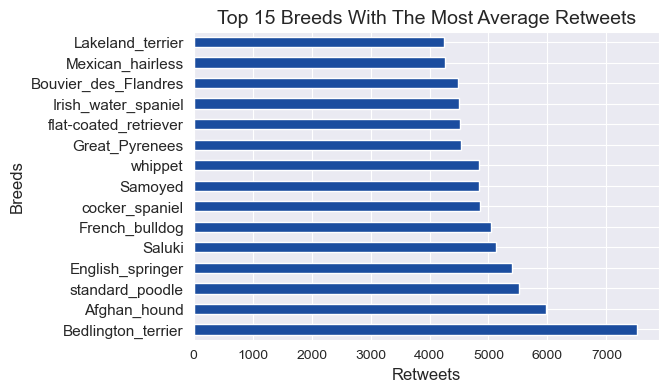

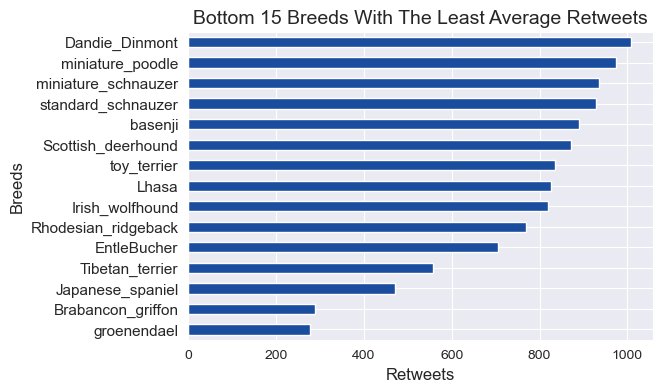

- The top three breeds with the most average retweet count are: [Bedlington Terrier](https://upload.wikimedia.org/wikipedia/commons/f/fe/Boutchie_apres_championnat_004.JPG) (7510.16), [Afghan Hound](https://upload.wikimedia.org/wikipedia/commons/e/e8/Afghan_dog_-_cropped.jpg) (5976), and [Standard Poodle](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Full_attention_%288067543690%29.jpg/1920px-Full_attention_%288067543690%29.jpg) (5508.91)
- The bottom three breeds with the least average retweet count are: [Groenendael](https://upload.wikimedia.org/wikipedia/commons/thumb/0/01/I%C2%B4Ker_de_R.Brown.jpg/1920px-I%C2%B4Ker_de_R.Brown.jpg) (276.5), [Brabancon Griffon](https://upload.wikimedia.org/wikipedia/commons/2/23/Monkey_Bizniz_Drama_Queen.jpg) (287.67), and [Japanese Spaniel](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9b/Chin_posing.jpg/1024px-Chin_posing.jpg) (471)

### The dog breeds that generated the most favourites

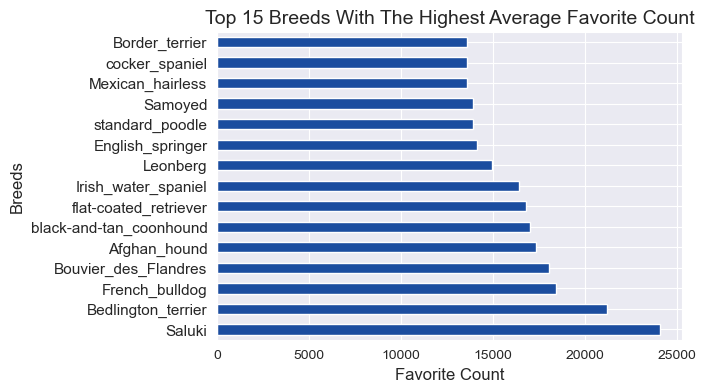

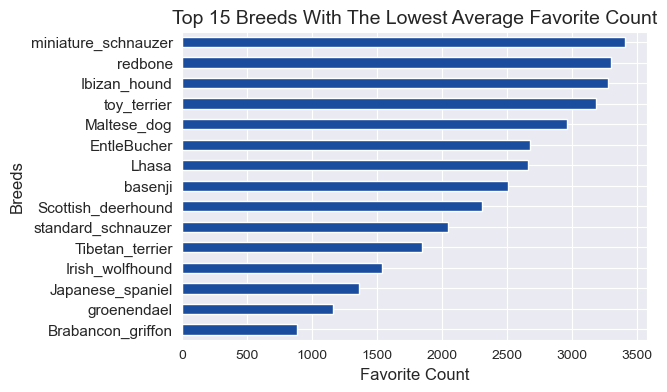

- The top three breeds with the highest average favorite count are: [Saluki](https://upload.wikimedia.org/wikipedia/commons/thumb/3/31/Red_Smooth_Saluki.jpg/1280px-Red_Smooth_Saluki.jpg) (24060), [Bedlington Terrier](https://upload.wikimedia.org/wikipedia/commons/f/fe/Boutchie_apres_championnat_004.JPG) (21153), and [French Bulldog](https://upload.wikimedia.org/wikipedia/commons/1/18/2008-07-28_Dog_at_Frolick_Field.jpg) (18416.81).
- The bottom three breeds with the lowest average favorite count are: [Brabancon Griffon](https://upload.wikimedia.org/wikipedia/commons/2/23/Monkey_Bizniz_Drama_Queen.jpg) (885), [Groenendael](https://upload.wikimedia.org/wikipedia/commons/thumb/0/01/I%C2%B4Ker_de_R.Brown.jpg/1920px-I%C2%B4Ker_de_R.Brown.jpg) (1156.5), and [Japanese Spaniel](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9b/Chin_posing.jpg/1024px-Chin_posing.jpg) (1362).

## Conclusions

- The breeds with the highest and lowest average ratings are [Bouvier Des Flandres](https://upload.wikimedia.org/wikipedia/commons/7/7f/Bouvier.JPG) (1.3) and [Japanese Spaniel](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9b/Chin_posing.jpg/1024px-Chin_posing.jpg) (0.5), respectively.
- The Tweet IDs 744234799360020481 and 666691418707132416 had the most and least retweets, respectively. While, Tweet IDs 822872901745569793 and 666099513787052032 had the highest and lowest favorite counts, respectively.
- [Bedlington Terrier](https://upload.wikimedia.org/wikipedia/commons/f/fe/Boutchie_apres_championnat_004.JPG) (7510.16) had the highest average retweets and [Groenendael](https://upload.wikimedia.org/wikipedia/commons/thumb/0/01/I%C2%B4Ker_de_R.Brown.jpg/1920px-I%C2%B4Ker_de_R.Brown.jpg) (276.5) had the lowest average retweets.
- [Saluki](https://upload.wikimedia.org/wikipedia/commons/thumb/3/31/Red_Smooth_Saluki.jpg/1280px-Red_Smooth_Saluki.jpg) (24060) were the most liked breeds, while [Brabancon Griffon](https://upload.wikimedia.org/wikipedia/commons/2/23/Monkey_Bizniz_Drama_Queen.jpg) (885) received the lowest average likes of any breed.

**Limitations** 

- The dog ratings by WeRateDogs are determined by dogs' action in the images or videos, which weren't analysed.
- Not all dog breeds were predicted.
- Only few tweets had dog stages.

## References
Wikipedia: https://en.wikipedia.org/wiki/WeRateDogs